### Simplifying problem using agglomerative clustering

In [54]:
import pandas as pd

pd.options.display.max_columns = 200

songs = pd.read_csv('data/spotify_clean.csv', index_col=[0])
songs = songs.drop_duplicates(['album_name', 'track_name'])
# Drop rows with missing values
songs.dropna(inplace=True)
# Drop non-numerical attributes
songs_og = songs.copy()
songs = songs.drop(columns = ["track_id", "artists", "album_name", "track_name"])
# Convert boolean column to int
songs['explicit'] = songs['explicit'].astype(int)

In [51]:
from sklearn.preprocessing import StandardScaler

# Use aggregated dataset to perform agglomerative clustering (its faster than on the full datset)
by_genre = songs.groupby('track_genre').mean()
# Normalize data before clustering since clustering relies on distances
scaler = StandardScaler()
by_genre[by_genre.columns] = scaler.fit_transform(by_genre.values)
by_genre.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,
acoustic,0.731569,-0.293351,-0.294764,-0.181436,-1.185032,-0.839857,-0.323314,1.520750,-0.614777,1.072664,-0.622650,-0.780405,-0.371134,-0.347368,-0.112459
afrobeat,-0.815313,0.459339,-0.575322,0.868867,0.374538,0.926619,0.140481,-0.967733,-0.039515,-0.204058,0.484915,-0.375076,1.524742,-0.306939,0.356483
alt-rock,0.840101,0.132054,-0.486886,-0.191319,0.655402,1.829325,0.625390,-0.035392,-0.515126,-0.877707,-0.517066,0.036630,0.352499,0.045990,0.289126
alternative,-1.698214,-0.574287,1.666377,0.520708,0.135893,-1.695350,0.617284,-0.727798,-0.043570,-0.547988,-0.651628,-0.313107,0.262648,-0.660229,0.535679
ambient,0.868452,-0.039862,-0.653231,-1.800187,-2.427659,-1.308709,-3.190684,-0.204870,-0.626230,2.099939,2.600699,-1.142092,-2.139528,-1.306355,-2.313078


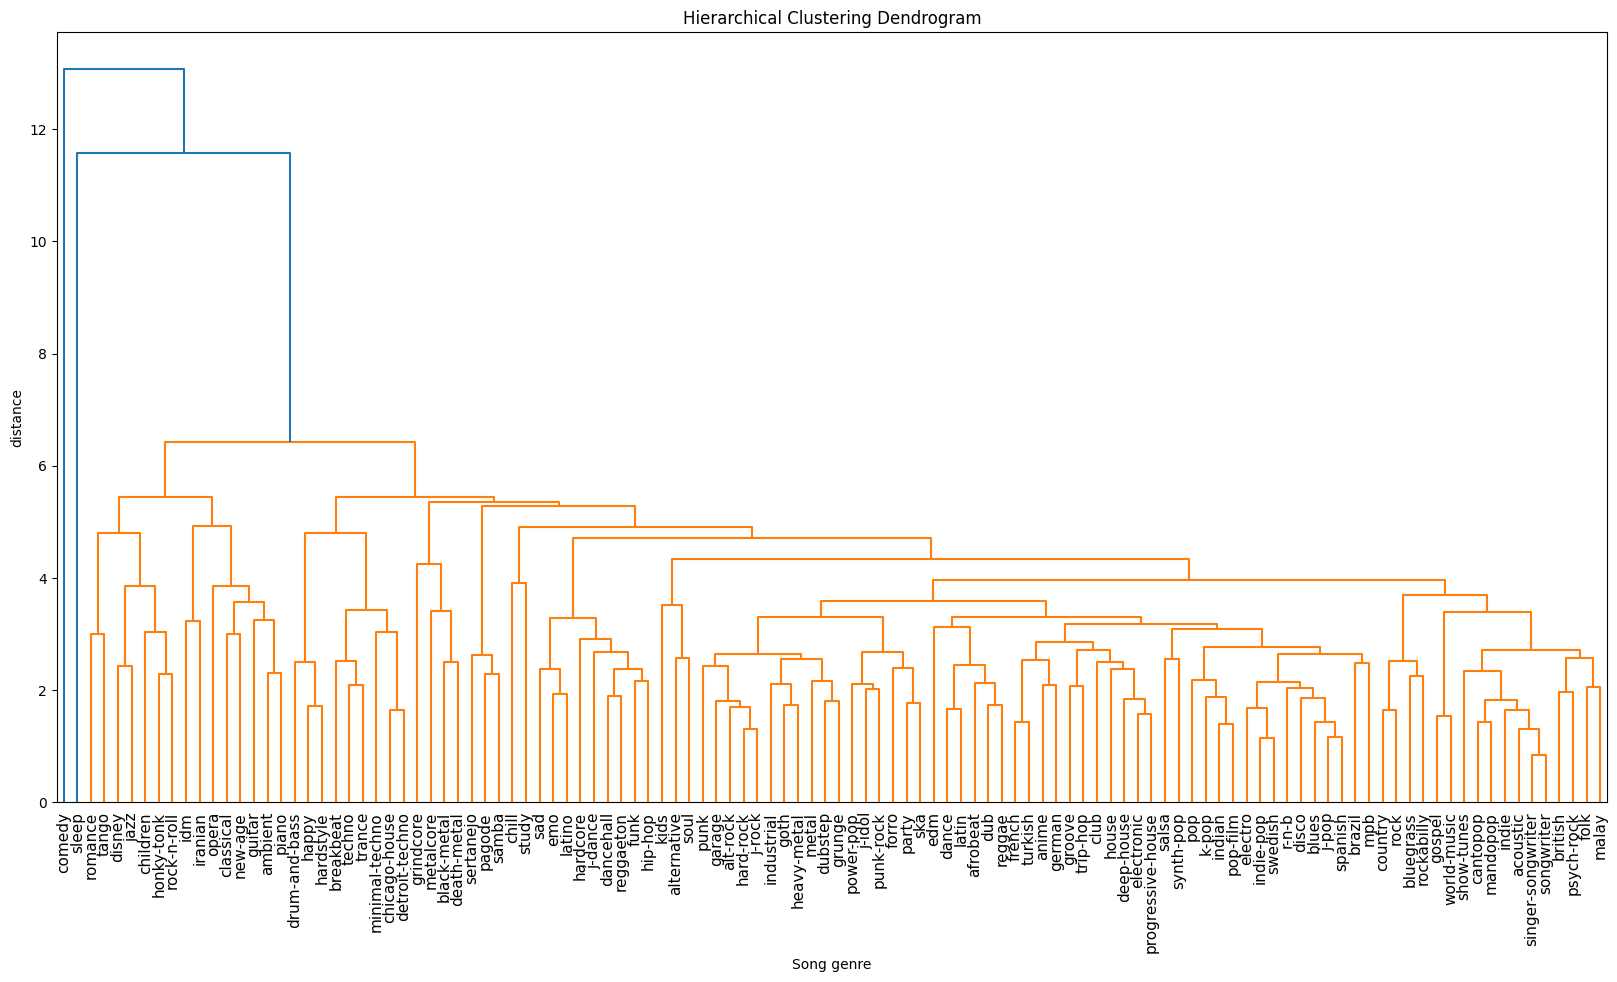

In [52]:
# import dendrogram and linkage from scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
cluster_data = by_genre
# create the hierarchical clustering
Z = linkage(cluster_data, 'average')

plt.figure(figsize=(20, 10))
# plot the dendrogram
dendrogram(Z, labels=list(by_genre.index))
# set the plot title
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Song genre')
plt.ylabel('distance')
plt.xticks(fontsize=11)
plt.show()

### Attempt to group genres based on clusters found

In [63]:
language = 'cantopop'
selected = songs_og[songs_og['track_genre'] == language]
# selected
selected.to_csv(language + '.csv', header=True)

In [48]:
print(genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'reggae', 'reggaeton', 'rock',

In [36]:
from sklearn.cluster import AgglomerativeClustering

# create the clusterer
agg = AgglomerativeClustering(n_clusters = 20, linkage='average')

# create the clusters
clusters = agg.fit_predict(cluster_data)
genres = list(by_genre.index)
cluster_to_genres = {}
for i, cluster in enumerate(clusters):
    if cluster not in cluster_to_genres:
        cluster_to_genres[cluster] = set()
    cluster_to_genres[cluster].add(genres[i])
cluster_to_genres

{3: {'acoustic',
  'british',
  'cantopop',
  'folk',
  'gospel',
  'indie',
  'malay',
  'mandopop',
  'psych-rock',
  'show-tunes',
  'singer-songwriter',
  'songwriter',
  'world-music'},
 0: {'afrobeat',
  'alt-rock',
  'anime',
  'blues',
  'brazil',
  'club',
  'dance',
  'deep-house',
  'disco',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'forro',
  'french',
  'garage',
  'german',
  'goth',
  'groove',
  'grunge',
  'hard-rock',
  'heavy-metal',
  'house',
  'indian',
  'indie-pop',
  'industrial',
  'j-idol',
  'j-pop',
  'j-rock',
  'k-pop',
  'latin',
  'metal',
  'mpb',
  'party',
  'pop',
  'pop-film',
  'power-pop',
  'progressive-house',
  'punk',
  'punk-rock',
  'r-n-b',
  'reggae',
  'salsa',
  'ska',
  'spanish',
  'swedish',
  'synth-pop',
  'trip-hop',
  'turkish'},
 2: {'alternative', 'kids', 'soul'},
 1: {'ambient', 'classical', 'guitar', 'new-age', 'piano'},
 13: {'black-metal', 'death-metal', 'metalcore'},
 9: {'bluegrass', 'country', 'rock',

### Manual grouping based on dendrogram (20 genres)
* Hand-crafted the following grouping based on the info on the dendrogram and by googling the parent genres of each genre
* Couldn't find genre-groupings for some of the genres (I left these on their own cluster)

In [42]:
genre_mapping = {
    'sleep': set(['sleep']),
    'comedy': set(['comedy']),
    'ambient': set(['ambient', 'piano', 'guitar', 'study', 'sad', 'chill', 'new-age']),
    'children': set(['children', 'kids','disney']),
    'classical': set(['classical', 'opera', 'romance']),
    'show-tunes': set(['show-tunes', 'singer-songwriter', 'songwriter', 'acoustic']),
    'folk': set(['folk', 'gospel', 'jazz', 'soul', 'funk', 'afrobeat', 'blues', 'r-n-b', 'groove', 'disco']),
    'country': set(['honky-tonk', 'bluegrass', 'country']),
    'pop': set(['pop', 'indie-pop', 'pop-film', 'k-pop', 'j-idol', 'j-pop', 'power-pop', 'synth-pop']),
    'rock': set(['indie', 'rock-n-roll', 'punk-rock', 'rock', 'alternative', 'j-rock', 'rockabilly', 'psych-rock', 'goth', 'punk', 'hard-rock', 'alt-rock', 'hardcore', 'emo']),
    'hip-hop': set(['trip-hop', 'hip-hop']),
    'metal': set(['grindcore', 'metalcore', 'grunge', 'metal', 'black-metal', 'death-metal', 'heavy-metal']),
    'edm': set(['idm', 'edm', 'party', 'dance', 'j-dance', 'club', 'garage', 'electronic', 'electro', 'dubstep', 'industrial',  'house', 'progressive-house', 'deep-house']),
    'techno': set(['techno', 'minimal-techno', 'chicago-house', 'detroit-techno', 'breakbeat', 'trance', 'hardstyle', 'happy', 'drum-and-bass']),
    'world': set(['world-music', 'mandopop', 'cantopop', 'malay', 'indian', 'iranian']),
    'european': set(['british', 'german', 'french', 'swedish', 'turkish']),
    'latin': set(['latin', 'latino', 'salsa', 'tango', 'spanish', 'reggaeton', 'brazil', 'sertanejo', 'forro', 'pagode', 'samba', 'mpb']),
    'reggae': set(['reggae', 'ska', 'dub', 'dancehall']),
    'anime': set(['anime'])
}

In [43]:
# Check that I didn't forget or misspell any of the original music genres
for genre in songs['track_genre'].unique():
    found = False
    for subgenres in genre_mapping.values():
        if genre in subgenres:
            found = True
            break
    if not found:
        print(f'Missing or misspelled genre: {genre}')

In [44]:
# Apply new genre groupping to entire dataset
songs = pd.read_csv('data/spotify_clean.csv', index_col=[0])
print(f"Unique genres before transformation: {len(songs['track_genre'].unique())}")

Unique genres before transformation: 114


In [45]:
modified_genres = []
for i in range(len(songs)):
    genre = songs['track_genre'].iloc[i]
    for parent_genre, sub_genres in genre_mapping.items():
        if genre in sub_genres:
            modified_genres.append(parent_genre)
            break
songs['track_genre'] = modified_genres
print(f"Unique genres after transformation: {len(songs['track_genre'].unique())}")

Unique genres after transformation: 19


In [46]:
# Save new dataset
songs.to_csv('data/spotify_data_simplified3.csv')